# Digit Recognizer

## There will be six steps

## 1. Data Understanding
## 2. Data Preparation
## 3. Feature Selection
## 4. Model Building
## 5. Hyperparameter Tuning
## 6. Final Result

In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [2]:
# loading dataset
train_dataset = pd.read_csv("../input/train.csv")
test_dataset = pd.read_csv("../input/test.csv")
container = [train_dataset, test_dataset]

## 1. Data Understanding

In [3]:
container[0].head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
container[1].head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
# Checking for row having null value

print(container[0][container[0].isnull().sum(axis = 1) > 0])
print("\n\n\n")
print(container[1][container[1].isnull().sum(axis = 1) > 0])

Empty DataFrame
Columns: [label, pixel0, pixel1, pixel2, pixel3, pixel4, pixel5, pixel6, pixel7, pixel8, pixel9, pixel10, pixel11, pixel12, pixel13, pixel14, pixel15, pixel16, pixel17, pixel18, pixel19, pixel20, pixel21, pixel22, pixel23, pixel24, pixel25, pixel26, pixel27, pixel28, pixel29, pixel30, pixel31, pixel32, pixel33, pixel34, pixel35, pixel36, pixel37, pixel38, pixel39, pixel40, pixel41, pixel42, pixel43, pixel44, pixel45, pixel46, pixel47, pixel48, pixel49, pixel50, pixel51, pixel52, pixel53, pixel54, pixel55, pixel56, pixel57, pixel58, pixel59, pixel60, pixel61, pixel62, pixel63, pixel64, pixel65, pixel66, pixel67, pixel68, pixel69, pixel70, pixel71, pixel72, pixel73, pixel74, pixel75, pixel76, pixel77, pixel78, pixel79, pixel80, pixel81, pixel82, pixel83, pixel84, pixel85, pixel86, pixel87, pixel88, pixel89, pixel90, pixel91, pixel92, pixel93, pixel94, pixel95, pixel96, pixel97, pixel98, ...]
Index: []

[0 rows x 785 columns]




Empty DataFrame
Columns: [pixel0, pixel1, p

In [6]:
# Info of datasets

print(container[0].info())
print("\n\n\n")
print(container[1].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB
None




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB
None


In [7]:
# Info of datasets

print(container[0].describe())
print("\n\n\n")
print(container[1].describe())

              label   pixel0   pixel1    ...     pixel781  pixel782  pixel783
count  42000.000000  42000.0  42000.0    ...      42000.0   42000.0   42000.0
mean       4.456643      0.0      0.0    ...          0.0       0.0       0.0
std        2.887730      0.0      0.0    ...          0.0       0.0       0.0
min        0.000000      0.0      0.0    ...          0.0       0.0       0.0
25%        2.000000      0.0      0.0    ...          0.0       0.0       0.0
50%        4.000000      0.0      0.0    ...          0.0       0.0       0.0
75%        7.000000      0.0      0.0    ...          0.0       0.0       0.0
max        9.000000      0.0      0.0    ...          0.0       0.0       0.0

[8 rows x 785 columns]




        pixel0   pixel1   pixel2    ...     pixel781  pixel782  pixel783
count  28000.0  28000.0  28000.0    ...      28000.0   28000.0   28000.0
mean       0.0      0.0      0.0    ...          0.0       0.0       0.0
std        0.0      0.0      0.0    ...          0.

In [8]:
# Checking the shape of train and test data

print(container[0].shape)
print(container[1].shape)

(42000, 785)
(28000, 784)


In [9]:
# Seeing the unique values in column data to be predicted

num = container[0]['label'].unique()
num.sort()
num

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

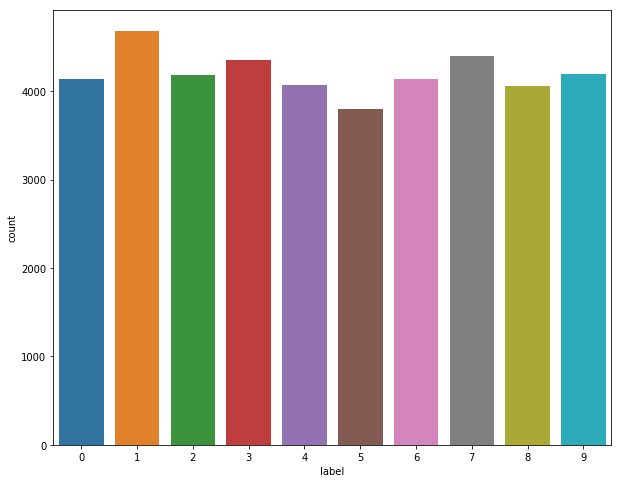

In [10]:
# Seeing the distribution of each label

plt.figure(figsize = (10,8))
sns.countplot(x = 'label', data = container[0], order = num)
plt.show()

In [11]:
# Checking the count of each pixel for a given number

num_mean = container[0].groupby('label').sum()
num_mean

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
label,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,10,216,216,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16,279,330,346,275,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1924,1700,1004,588,328,253,45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,404,269,248,231,99,0,51,112,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,917,791,354,367,618,522,193,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,114,255,255,86,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,116,254,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16,55,443,1129,1859,2459,5096,7038,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,94398,62865,37356,19510,6557,1649,1081,156,0,59,0,0,0,0,0,0,0,258,1464,3226,4598,7249,11828,16183,20462,22478,26796,24282,19726,13912,8127,4133,1748,380,520,120,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,57,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 2. Data Preparation

In [12]:
# Dividing data in X and y

X = container[0].drop(['label'], axis = 1)
y = container[0]['label']

In [13]:
# Scaling X as pixel value ranges from 0 to 254

X = scale(X)

In [14]:
# Dividing in train and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.9, test_size = 0.1, random_state = 101)

## 3. Feature Selection

In [15]:
# Creating an instance of PCA

pca = PCA(svd_solver = 'randomized', random_state = 42)

In [16]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [17]:
pca.explained_variance_ratio_

array([5.73564311e-02, 4.09979478e-02, 3.76132163e-02, 2.94136678e-02,
       2.54555672e-02, 2.21916948e-02, 1.93882584e-02, 1.77260589e-02,
       1.55493347e-02, 1.42001290e-02, 1.35595262e-02, 1.22248890e-02,
       1.13644284e-02, 1.11828679e-02, 1.04718878e-02, 1.00855551e-02,
       9.41149975e-03, 9.35263628e-03, 9.04045784e-03, 8.80876743e-03,
       8.35204724e-03, 8.10384740e-03, 7.78997845e-03, 7.50689632e-03,
       7.24177879e-03, 6.97754894e-03, 6.89250131e-03, 6.68446487e-03,
       6.33180109e-03, 6.18572945e-03, 6.10324296e-03, 5.92881137e-03,
       5.79731076e-03, 5.73298927e-03, 5.65080670e-03, 5.45682409e-03,
       5.40975701e-03, 5.23331691e-03, 5.06451747e-03, 4.96125057e-03,
       4.87790819e-03, 4.82189721e-03, 4.78603848e-03, 4.66809950e-03,
       4.57859682e-03, 4.51521162e-03, 4.45136403e-03, 4.43270807e-03,
       4.41280128e-03, 4.34536518e-03, 4.29733822e-03, 4.20328522e-03,
       4.05972120e-03, 4.00871491e-03, 3.93204676e-03, 3.89393993e-03,
      

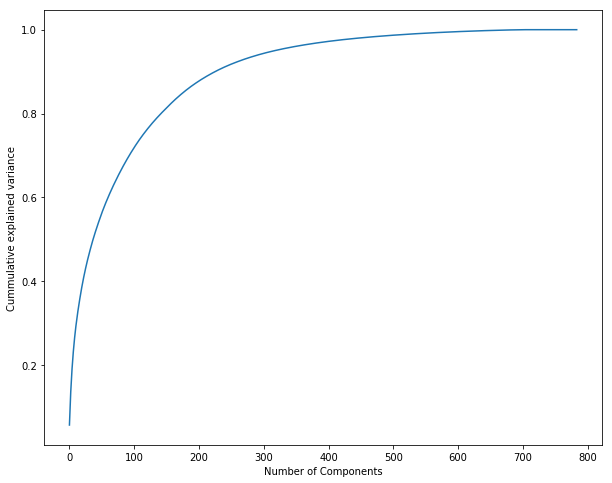

In [18]:
# plotting cummulative variance to get better understanding

plt.figure(figsize = (10,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Cummulative explained variance")
plt.show()

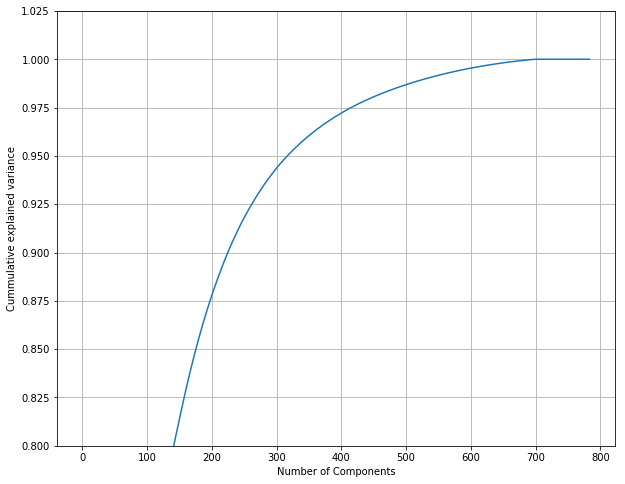

In [19]:
# plotting cummulative variance to get better understanding (Zooming in)

plt.figure(figsize = (10,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Cummulative explained variance")
plt.ylim(0.8, 1.025)
plt.grid()
plt.show()

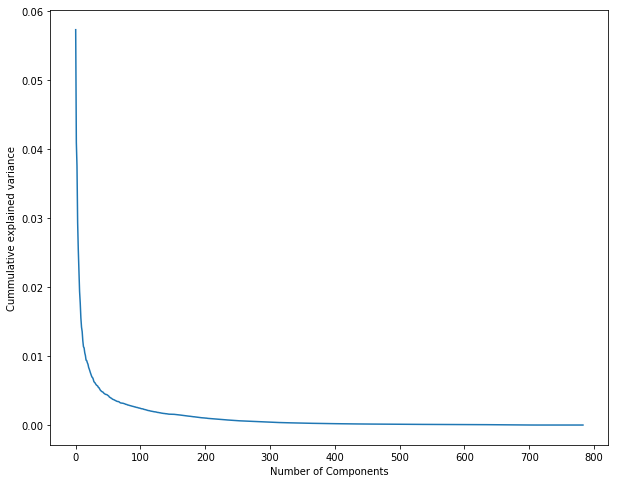

In [20]:
# plotting variance of each component to get better understanding

plt.figure(figsize = (10,8))
plt.plot(pca.explained_variance_ratio_)
plt.xlabel("Number of Components")
plt.ylabel("Cummulative explained variance")
plt.show()

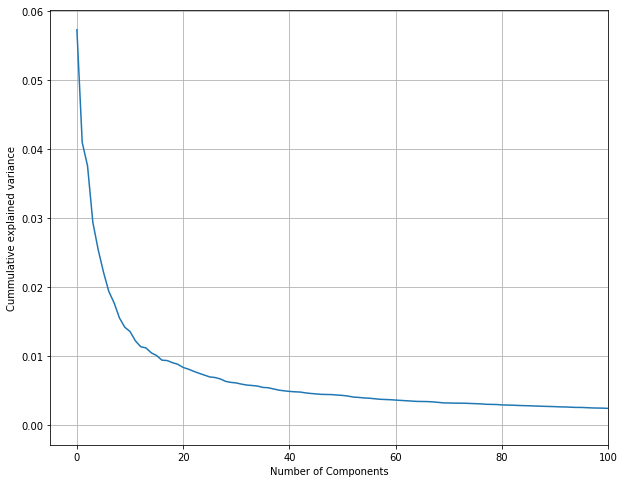

In [21]:
# plotting variance of each component to get better understanding (Zooming in)

plt.figure(figsize = (10,8))
plt.plot(pca.explained_variance_ratio_)
plt.xlabel("Number of Components")
plt.ylabel("Cummulative explained variance")
plt.xlim(-5,100)
plt.grid()
plt.show()

In [22]:
## Tuning hyperparameters

## Creating instance of model and pca
#model = SVC(kernel = 'rbf')
#pca = PCA()

## Creating pipeline instance
#pipe = Pipeline(steps = [('pca', pca), ('model', model)])


#folds = KFold(n_splits = 3, shuffle = True, random_state = 4)

#param_grid = [{'pca__n_components' : [35, 50],
#              'model__C' : [1, 10, 100, 1000], 
#              'model__gamma' : [0.0001, 0.001, 0.01]
#              }]

#model_cv = GridSearchCV(estimator = pipe,
#                        param_grid = param_grid,
#                        scoring = 'accuracy',
#                        cv = folds,
#                        verbose = 1,
#                        return_train_score = True)

#model_cv.fit(X_train, y_train)

#model_cv.best_params_

### Used the above code and got the best parameters as n_components = 35, C = 100, gamma = 0.001
### Therefore we will select 35 features

In [23]:
# Building final model and checking

pca = PCA(n_components = 35)

model = SVC(C = 20, gamma = 0.001, kernel = 'rbf')

In [24]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=35, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [25]:
X_train_tr = pca.transform(X_train)
X_test_tr = pca.transform(X_test)

In [26]:
model.fit(X_train_tr, y_train)

SVC(C=20, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [27]:
y_pred = model.predict(X_test_tr)

In [28]:
model.score(X_test_tr, y_test)

0.9714285714285714

In [29]:
model.score(X_train_tr, y_train)

0.9867989417989418

## 4. Model Building

In [30]:
# Now we will build our final model with the entire dataset
# For final model dividing dataset in train and test

X_train_f = container[0].drop(['label'], axis = 1)
X_test_f = container[1]
y_train_f = container[0]['label']

In [31]:
# Scaling the data
X_train_f = scale(X_train_f)
X_test_f = scale(X_test_f)

In [32]:
# Using PCA to reduce dimunsions

pca_f = PCA(n_components = 35)

In [33]:
X_train_ft = pca_f.fit_transform(X_train_f)

In [34]:
X_train_ft.shape

(42000, 35)

In [35]:
X_test_ft = pca_f.transform(X_test_f)

In [36]:
X_test_ft.shape

(28000, 35)

## 5. Hyperparameter Tuning

In [37]:
# Hyperparameter tuning
# Here again running the hypermater to plot graph with results

# Instantiating SVC model
model = SVC(kernel = 'rbf')

# Instantiating flods
folds = KFold(n_splits = 3, shuffle = True, random_state = 4)

param_grid = [{'C' : [1, 10, 100, 1000],
               'gamma' : [0.0001, 0.001, 0.01]}]


model_cv = GridSearchCV(estimator = model,
                        param_grid = param_grid,
                        scoring = 'accuracy',
                        cv = folds,
                        verbose = 1,
                        return_train_score = True)

model_cv.fit(X_train_ft, y_train_f)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed: 30.0min finished


GridSearchCV(cv=KFold(n_splits=3, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.0001, 0.001, 0.01]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=1)

In [38]:
cv_results = pd.DataFrame(model_cv.cv_results_)

cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,28.062633,0.241320,16.566480,0.093249,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.906714,0.904071,0.909786,0.906857,0.002335,12,0.908250,0.909607,0.907857,0.908571,0.000750
1,13.978963,0.180629,9.688074,0.050833,1,0.001,"{'C': 1, 'gamma': 0.001}",0.950143,0.948071,0.948500,0.948905,0.000893,9,0.954643,0.956571,0.956071,0.955762,0.000817
2,38.574469,0.112109,12.569624,0.007849,1,0.01,"{'C': 1, 'gamma': 0.01}",0.958429,0.955714,0.956643,0.956929,0.001126,8,0.992286,0.992500,0.991500,0.992095,0.000430
3,13.883517,0.218506,9.988148,0.045857,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.926214,0.925071,0.928214,0.926500,0.001299,11,0.929107,0.931500,0.929679,0.930095,0.001020
4,9.208394,0.124748,6.187570,0.026858,10,0.001,"{'C': 10, 'gamma': 0.001}",0.966214,0.964286,0.966214,0.965571,0.000909,3,0.980643,0.981000,0.980786,0.980810,0.000147
5,37.943951,0.106314,12.458844,0.077636,10,0.01,"{'C': 10, 'gamma': 0.01}",0.961929,0.960571,0.959786,0.960762,0.000885,5,0.999643,0.999536,0.999750,0.999643,0.000087
6,10.447466,0.214482,6.998660,0.119125,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.947286,0.944286,0.946571,0.946048,0.001280,10,0.954714,0.956714,0.956643,0.956024,0.000926
7,8.560144,0.103959,5.088477,0.026597,100,0.001,"{'C': 100, 'gamma': 0.001}",0.970000,0.966571,0.969500,0.968690,0.001512,1,0.995821,0.995714,0.995429,0.995655,0.000166
8,37.884174,0.138095,12.456874,0.025885,100,0.01,"{'C': 100, 'gamma': 0.01}",0.961786,0.960071,0.960143,0.960667,0.000792,6,1.000000,1.000000,1.000000,1.000000,0.000000
9,12.026575,0.187245,5.154645,0.009889,1000,0.0001,"{'C': 1000, 'gamma': 0.0001}",0.964214,0.962071,0.963929,0.963405,0.000950,4,0.981321,0.981429,0.981250,0.981333,0.000073


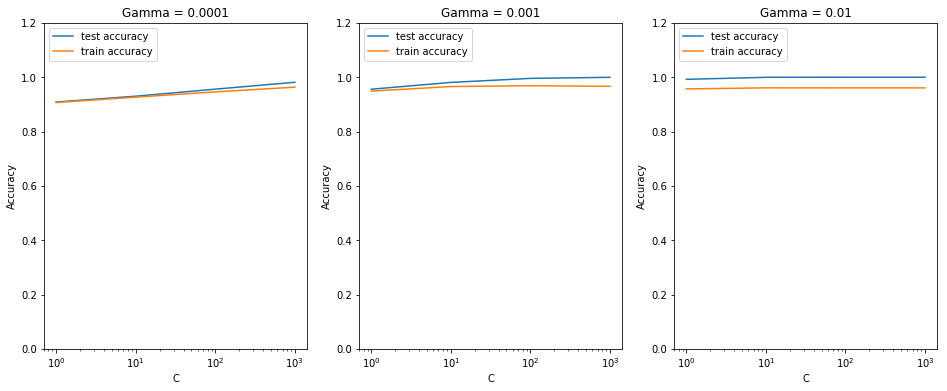

In [39]:
# Plotting the results

plt.figure(figsize = (16,6))

plt.subplot(1,3,1)
gamma_01 = cv_results[cv_results['param_gamma'] == 0.0001]

plt.plot(gamma_01['param_C'], gamma_01['mean_train_score'])
plt.plot(gamma_01['param_C'], gamma_01['mean_test_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Gamma = 0.0001')
plt.ylim([0.00, 1.2])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

plt.subplot(1,3,2)
gamma_02 = cv_results[cv_results['param_gamma'] == 0.001]

plt.plot(gamma_01['param_C'], gamma_02['mean_train_score'])
plt.plot(gamma_01['param_C'], gamma_02['mean_test_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Gamma = 0.001')
plt.ylim([0.00, 1.2])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

plt.subplot(1,3,3)
gamma_03 = cv_results[cv_results['param_gamma'] == 0.01]

plt.plot(gamma_01['param_C'], gamma_03['mean_train_score'])
plt.plot(gamma_01['param_C'], gamma_03['mean_test_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Gamma = 0.01')
plt.ylim([0.00, 1.2])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

plt.show()

In [40]:
model_cv.best_params_

{'C': 100, 'gamma': 0.001}

In [41]:
# Again tuened with the below hyperparameter

#param_grid = [{'C' : [10, 15, 20, 30, 40, 50, 100, 500],
#               'gamma' : [0.0005, 0.001, 0.005]}]

# Got best paramenter as C = 20, gamma = 0.001

In [42]:
# Building final model

model = SVC(C = 20, gamma = 0.001, kernel = 'rbf')

model.fit(X_train_ft, y_train_f)

SVC(C=20, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## 6. Final Results

In [43]:
# Final predictions

y_pred = model.predict(X_test_ft)

In [44]:
d = pd.DataFrame({'ImageId': np.arange(1,len(y_pred) + 1), 'Label': y_pred})
d.set_index('ImageId', inplace = True)
d.to_csv('predictions.csv', sep=",")